<a href="https://colab.research.google.com/github/Kritika1204/House_Sales_Analysis/blob/master/House%20Price%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KC House Price Report


In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv("kc_house_data.csv")


**This dataset contains house sale prices for King County, which includes Seattle.
King County is a county located in the U.S. state of Washington. The population was 2,233,163 in the 2018 census estimate. King is the most populous county in Washington, and the 12th-most populous in the United States.**

In [3]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##Data Description


**id** - a notation for a house

**date** - Date house was sold

**price** - Price is prediction target

**bedrooms** - Number of Bedrooms/House

**bathrooms** - Number of bathrooms/House

**sqft_living**  - square footage of the home

**sqft_lot** - square footage of the lot

**floors** - Total floors (levels) in house

**waterfront** - House which has a view to a waterfront

**view** - Has been viewed

**condition** - How good the condition is ( Overall )

**grade** - overall grade given to the housing unit, based on King County grading system

**sqft_above** - square footage of house apart from basement

**sqft_basement** - square footage of the basement

**yr_built**  - Built Year

**yr_renovated** - Year when house was renovated

**zipcode** - zip

**lat** - Latitude coordinate

**long** - Longitude coordinate

**sqft_living15** - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15** - lotSize area in 2015(implies-- some renovations)

In [4]:
df.shape

(21613, 21)

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in our dataset.

In [7]:
df.drop(['id','lat','long','zipcode'],axis=1).describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000


####We can drop off the some columns like - 'id', 'lat', 'long', 'zipcode'. As they will not cause much effect on our house price prediction analysis.

##Univariate Analysis

We look at the basic statistics of the dataset and try to identify the distribution and abnormalities of the data. Here, we also tried to look at other variable and the stability of variables.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

####Now, we will look at bedrooms as it is one of a key factor to buy a house.

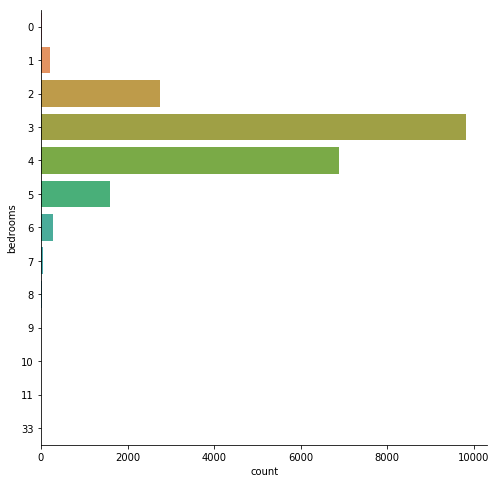

In [10]:
plt.subplots(figsize=(8,8))
sns.countplot(data=df,y='bedrooms')
sns.despine()

In [11]:
df['bedrooms'].describe().to_frame()

,bedrooms
count,21613.000000
mean,3.370842
std,0.930062
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,33.000000


In [14]:
df.query('bedrooms==33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [15]:
df.query('bedrooms==3').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


####By looking at the living area and houses having 3 bedrooms , we observed that it is not possible to have 33 bedrooms with a living area of 1620. The 33 bedrooms may be wrongly entered. Therefore, we can impute this value with 3.

In [16]:
df['bedrooms'].replace(33,3).describe().to_frame()

,bedrooms
count,21613.000000
mean,3.369454
std,0.907964
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,11.000000


The number of maximum bedrooms has been reduced to 11.Now the data seems to be okay here.

####Now try to look at the analysis part of bathrooms.

In [17]:
df['bathrooms'].head().to_frame()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


Here we observe that the number of bathrooms is a non-integral value.To understand this.

**Read** - **In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". This lack of a single, universal definition commonly results in discrepancies between advertised and actual number of baths in real estate listings. An additional complication is that there are currently two ways of notating the number of bathrooms in a dwelling. One method is to count a half bathroom as ".5" and then add this to the number of full bathrooms (e.g., "2.5" baths would mean 2 full baths and 1 half bath). The other, newer method is to put the number of full bathrooms to the left side of the decimal point and to put the number of half bathrooms to the right of the decimal point (e.g., "2.1" would mean 2 full baths and 1 half bath; "3.2" would mean 3 full baths and 2 half baths).**

In [18]:
df['bathrooms'].describe().to_frame()

,bathrooms
count,21613.000000
mean,2.114757
std,0.770163
min,0.000000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


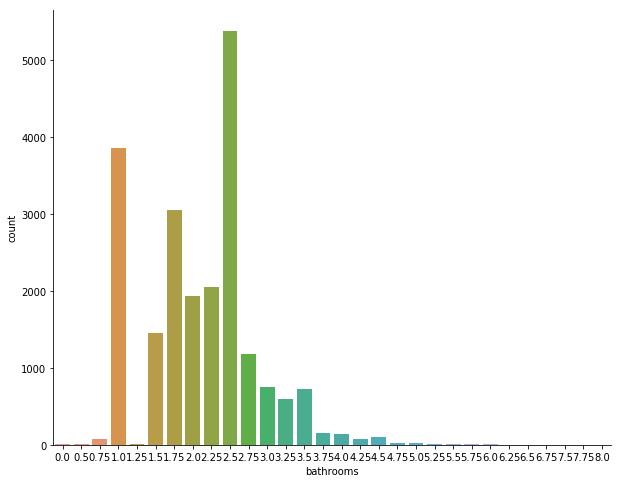

In [19]:
plt.subplots(figsize=(10,8))
sns.countplot(data=df, x='bathrooms')
sns.despine()

####We also try to look at the number of full and half bathrooms.

In [0]:
df['full_bathrooms'] = df['bathrooms'].round(0)

In [21]:
df['full_bathrooms'].describe().to_frame()

,full_bathrooms
count,21613.000000
mean,2.058715
std,0.755524
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,8.000000


In [23]:
df['half_bathrooms'] = df['bathrooms'] - df['full_bathrooms']
df['half_bathrooms'].describe().to_frame()

,half_bathrooms
count,21613.000000
mean,0.056043
std,0.326397
min,-0.500000
25%,-0.250000
50%,0.000000
75%,0.500000
max,0.500000


All values seems to be fine for the 'bathrooms' dataframe.

**We look at sqft_living now.**

In [24]:
df['sqft_living'].head().to_frame()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [25]:
df['sqft_living'].describe().to_frame()

,sqft_living
count,21613.000000
mean,2079.899736
std,918.440897
min,290.000000
25%,1427.000000
50%,1910.000000
75%,2550.000000
max,13540.000000


Square ft living is also one of an important aspect to look at to buy house. Here we see that the maximum living area goes around some 14,000 sq_fts, whereas average living area in King County is around 2,000sq_fts.

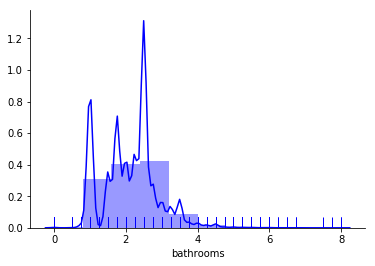

In [26]:
sns.distplot(df['bathrooms'], bins=10, kde='False', rug='True', color='blue')
sns.despine()

####Now we will look at the houses possesing waterfronts too.

In [29]:
df['waterfront'].describe().to_frame()

,waterfront
count,21613.000000
mean,0.007542
std,0.086517
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


So, here we have only one house having a waterfront. 

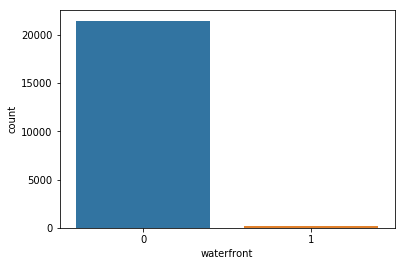

In [30]:
sns.countplot(data=df,x='waterfront')
plt.show()

####Now we will look at the house grade.

In [31]:
df['grade'].head().to_frame()

,grade
0,7
1,7
2,6
3,7
4,8


Grade tells us the overall grsde of the housing unit which has been assingned according to KIng County Housing trend which is as follows:

####  Value	Definition
0    -    	Unknown

1     -   	Cabin

2	     -   Substandard

3     -   	Poor

4	   -     Low

5    -   	Fair

6    -   	Low Average

7	   -     Average

8     - 	Good

9	    -    Better

10	-    Very Good

11   - 	Excellent

12	  -  Luxury

13  - 	Mansion 



In [32]:
df['grade'].describe().to_frame()

,grade
count,21613.000000
mean,7.656873
std,1.175459
min,1.000000
25%,7.000000
50%,7.000000
75%,8.000000
max,13.000000


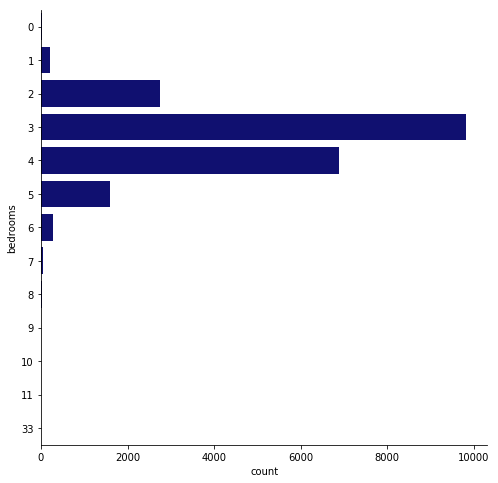

In [33]:
plt.subplots(figsize=(8,8))
sns.countplot(data=df,y='bedrooms',color='navy')
sns.despine()

Here we observe that on an average we have good grade houses in King County but only a maximum of 13 houses have been assigned a grade of mansions.

##Correlation Between Variables

####Here we look at the correlation between the different variables.

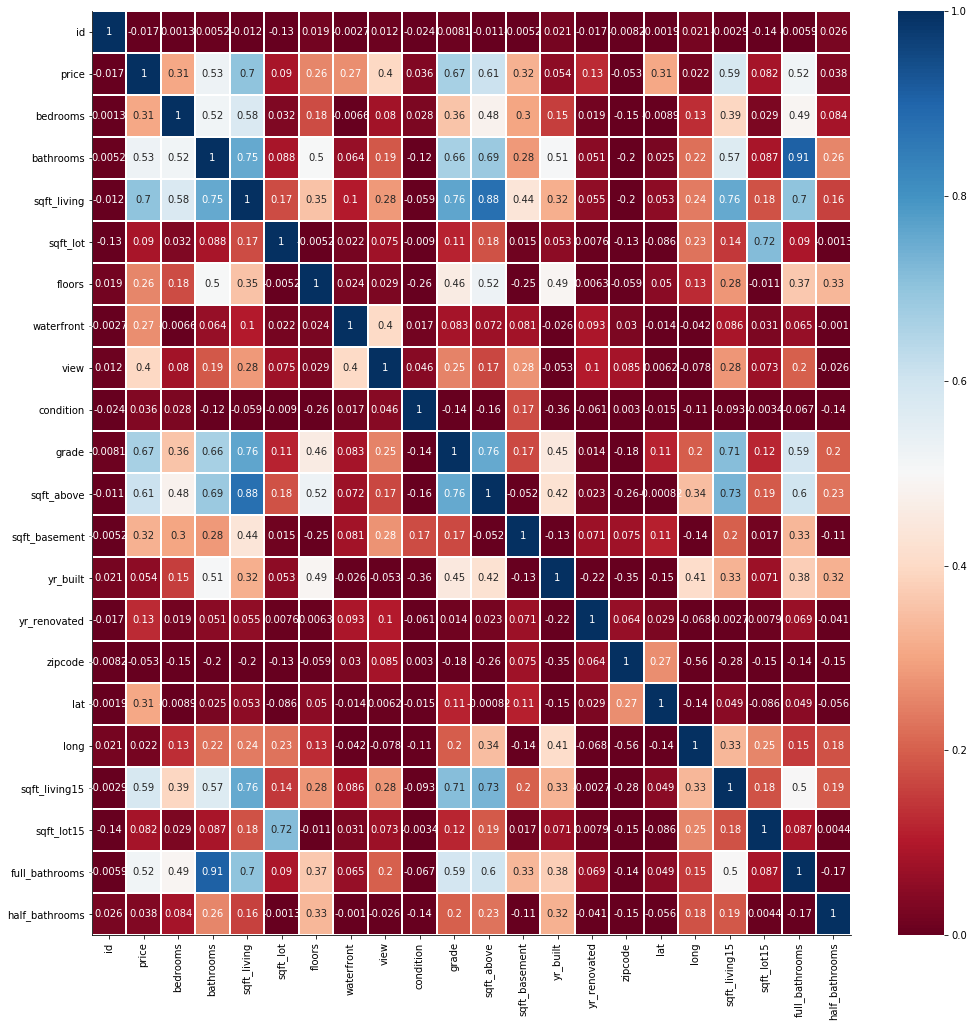

In [35]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.corr(), vmin=0, vmax=1,annot=True, cmap='RdBu', linewidth=1)
sns.despine()

So we see there is a strong correlation between these pairs:-

sqft_living - price

grade - price

bedrooms- price



##Bivariate Analysis

We look at the bivariate relationship between the variables.

####Relation between 'sqft_living' and 'price' 

In [36]:
df[['sqft_living','price']].describe()

,sqft_living,price
count,21613.000000,2.161300e+04
mean,2079.899736,5.400881e+05
std,918.440897,3.671272e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


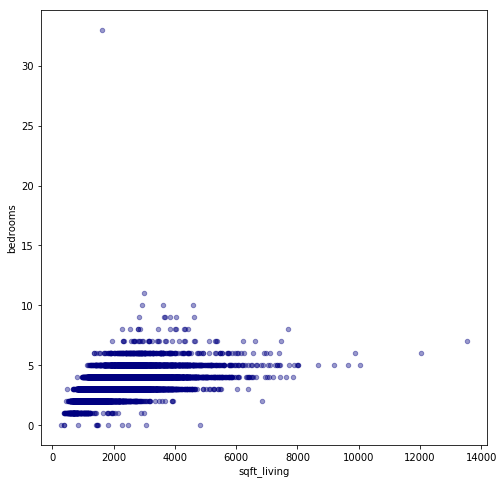

In [37]:
df.plot.scatter(x='sqft_living',y='bedrooms',alpha=0.4,figsize=(8,8), color='navy')
plt.show()


####Here we see that the price of house is increasing with increase in living square ft area.

####'Price'  and  'grade'

In [38]:
df[['price','grade']].describe()

,price,grade
count,2.161300e+04,21613.000000
mean,5.400881e+05,7.656873
std,3.671272e+05,1.175459
min,7.500000e+04,1.000000
25%,3.219500e+05,7.000000
50%,4.500000e+05,7.000000
75%,6.450000e+05,8.000000
max,7.700000e+06,13.000000


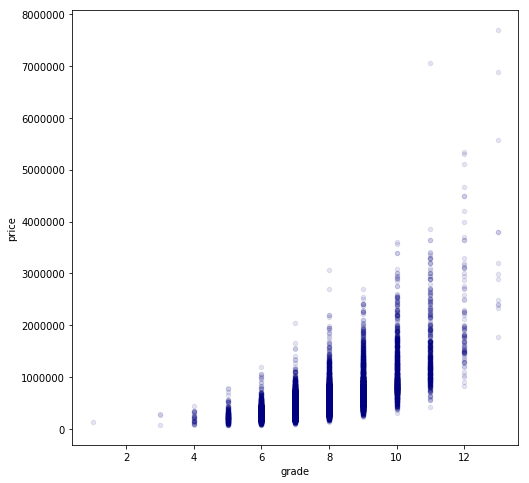

In [40]:
df.plot.scatter(x='grade',y='price',alpha=0.1,figsize=(8,8), color='navy')
plt.show()


Here we see that price is high for higher grades of houses, which is quite obvious. 

####'Price' and 'Bedrooms'

In [41]:
df[['price','bedrooms']].describe()

,price,bedrooms
count,2.161300e+04,21613.000000
mean,5.400881e+05,3.370842
std,3.671272e+05,0.930062
min,7.500000e+04,0.000000
25%,3.219500e+05,3.000000
50%,4.500000e+05,3.000000
75%,6.450000e+05,4.000000
max,7.700000e+06,33.000000


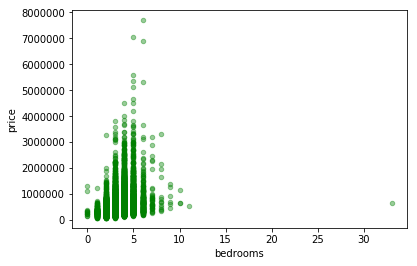

In [42]:

df.plot.scatter(x='bedrooms',y='price',color='green',alpha=0.4)
plt.show()

For houses with average no. of bedrooms price is high but price for houses having maximum no. of bedrooms is low. This may be due to the reason people are not interested in buying house with a very large number of bedrooms.

##Multivariate Analysis

Here we try to look at some more factors:

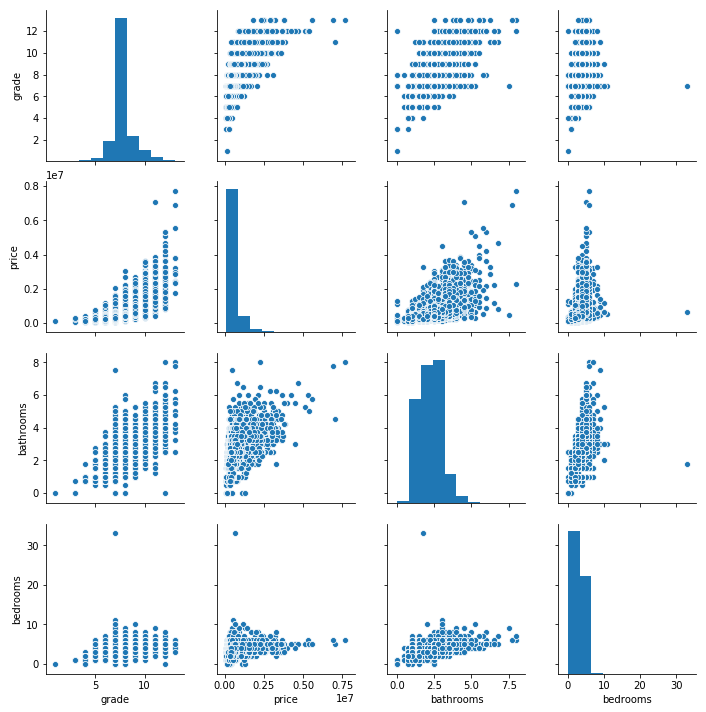

In [43]:
sns.pairplot(df[['grade','price','bathrooms','bedrooms']], height=2.5)

We  see how these factors are interdependent on each other and effect the sales of a house in King County.

##Conclusion

Here we try to look at some important factors that needs to be considered while buying a house and their variations with the house price.